In [1]:
import rootpath
import sys
sys.path.append(rootpath.detect())

import matplotlib.pyplot as plt
import numpy as np
from testsuite.surrogates import GP, MultiSurrogate
from testsuite.utilities import Pareto_split

In [2]:
seed = 1
INVERT = True
uncertainty= 0.1

In [3]:
def image_infill(opt, front_value = 0., n_contours=20):
    #figure_properties
    fig = plt.figure(figsize=[9,7])
    ax = fig.gca()
    ax.set_xlim([0,1.5])
    ax.set_ylim([0,1.5])
    
    # compute infill
    M, N = 200, 200
    x = np.linspace(0, 1.5, M)
    y = np.linspace(0, 1.5, N)
    xx, yy = np.meshgrid(x, y)
    xy = np.vstack((xx.flat, yy.flat)).T
    
    print(xy.shape)
    zz = np.array([opt._scalarise_y(xyi, np.ones_like(xyi)*uncertainty, invert=INVERT) for xyi in xy])
    zz = zz.reshape(N,M)
    
    #image infill
    pcol = ax.pcolor(xx, yy, zz)
    levels = np.linspace(zz.min(), zz.max(), n_contours+2)[1:-1]
    ax.contour(xx, yy, zz, colors="white", levels=levels)
    if front_value is not None:
        ax.contour(xx, yy, zz, colors="C3", levels=[front_value])
        front_legend = plt.Line2D([0], [0], c="C3")
    
    # scatter samples
    ax.scatter(opt.d[:,0], opt.d[:,1], facecolors='none', edgecolors="C3", linewidth=2., label="dominated samples")
    ax.scatter(opt.p[:,0], opt.p[:,1], c="C3", label="non-dominated samples")
    fig.colorbar(pcol)
    handles, labels = ax.get_legend_handles_labels()
    handles.append(front_legend)
    labels.append("{}".format(front_value))
    ax.legend(handles, labels)
    
    return fig

(40000, 2)


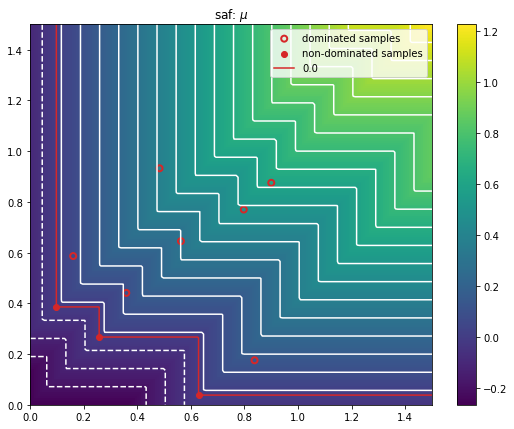

In [4]:
from testsuite.optimisers import Saf

saf_opt = Saf(objective_function=lambda x: x[0:2], ei=False,  limits=[[0, 0, 0, 0, 0], [1,1,1,1,1]], surrogate=MultiSurrogate(GP), n_initial=10, seed=seed)
fig_saf = image_infill(saf_opt)
fig_saf.axes[0].set_title("saf: $\mu$");

(40000, 2)


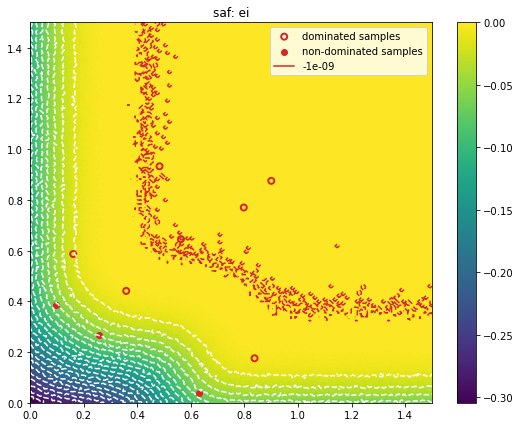

In [5]:
from testsuite.optimisers import Saf

safei_opt = Saf(objective_function=lambda x: x[0:2], ei=True,  limits=[[0, 0, 0, 0, 0], [1,1,1,1,1]], surrogate=MultiSurrogate(GP), n_initial=10, seed=seed)
front_v = -1e-9 if INVERT else 1e-8
fig_safei = image_infill(safei_opt, front_value=front_v)
fig_safei.axes[0].set_title("saf: ei");

(40000, 2)


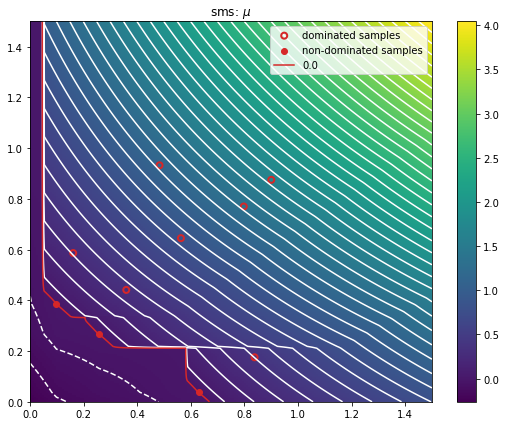

In [6]:
from testsuite.optimisers import SmsEgo

smsego_opt = SmsEgo(objective_function=lambda x: x[0:2], ei=False,  limits=[[0, 0, 0, 0, 0], [1,1,1,1,1]], surrogate=MultiSurrogate(GP), n_initial=10, seed=seed)
fig_smsego = image_infill(smsego_opt, n_contours=40)
fig_smsego.axes[0].set_title("sms: $\mu$");

(40000, 2)


Text(0.5, 1.0, 'sms: ei')

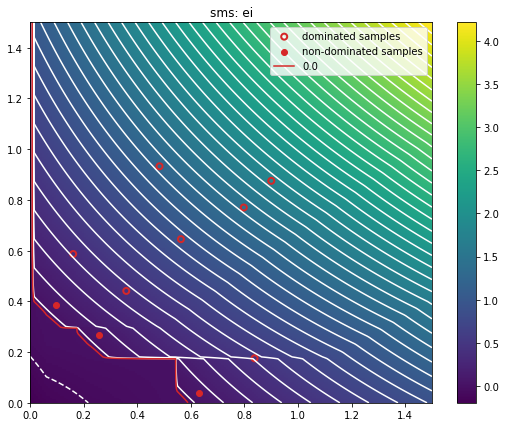

In [7]:
smsego_ei_opt = SmsEgo(objective_function=lambda x: x[0:2], ei=True,  limits=[[0, 0, 0, 0, 0], [1,1,1,1,1]], surrogate=MultiSurrogate(GP), n_initial=10, seed=seed)
fig_smsego_ei = image_infill(smsego_ei_opt, n_contours=40)
fig_smsego_ei.axes[0].set_title("sms: ei") 

(40000, 2)


Text(0.5, 1.0, 'Mpoi')

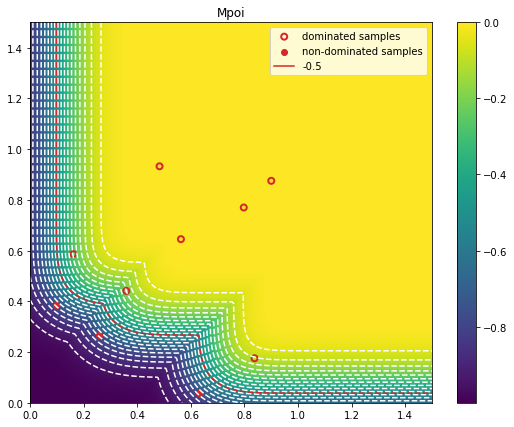

In [8]:
from testsuite.optimisers import Mpoi 

mpoi_opt = Mpoi(objective_function=lambda x: x[0:2],  limits=[[0, 0, 0, 0, 0], [1,1,1,1,1]], surrogate=MultiSurrogate(GP), n_initial=10, seed=seed)
front_v = -0.5 if INVERT else 0.5
fig_mpoi = image_infill(mpoi_opt, front_value=front_v)
fig_mpoi.axes[0].set_title("Mpoi") 

(40000, 2)


Text(0.5, 1.0, 'sms-ego | saf')

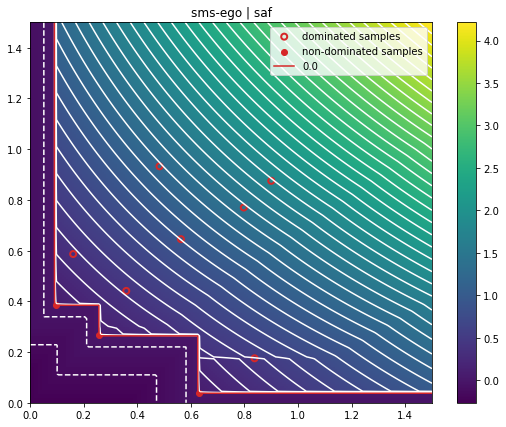

In [4]:
from testsuite.optimisers import Saf_Sms

safsms_opt = Saf_Sms(objective_function=lambda x: x[0:2], ei=True,  limits=[[0, 0, 0, 0, 0], [1,1,1,1,1]], surrogate=MultiSurrogate(GP), n_initial=10, seed=seed)
fig_safsms = image_infill(safsms_opt, n_contours=40)
fig_safsms.axes[0].set_title("sms-ego | saf") 

(40000, 2)


Text(0.5, 1.0, 'sms-ego | saf')

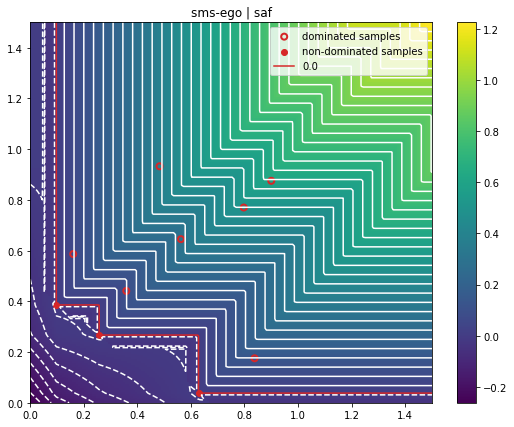

In [4]:
from testsuite.optimisers import Sms_Saf

smssaf_opt = Sms_Saf(objective_function=lambda x: x[0:2], ei=False,  limits=[[0, 0, 0, 0, 0], [1,1,1,1,1]], surrogate=MultiSurrogate(GP), n_initial=10, seed=seed)
fig_smssaf = image_infill(smssaf_opt, n_contours=40)
fig_smssaf.axes[0].set_title("sms-ego | saf") 

(40000, 2)


Text(0.5, 1.0, 'saf ei | saf $\\mu$')

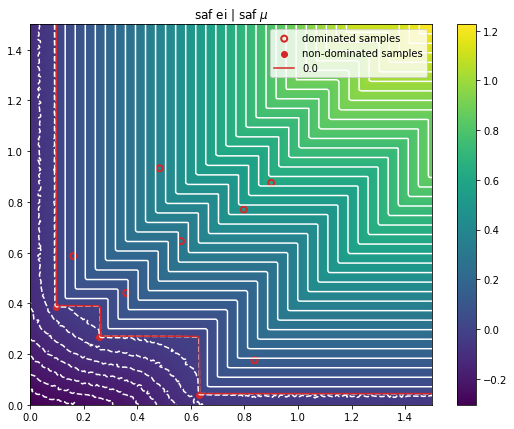

In [9]:
from testsuite.optimisers import Saf_Saf

safsaf_opt = Saf_Saf(objective_function=lambda x: x[0:2], ei=True,  limits=[[0, 0, 0, 0, 0], [1,1,1,1,1]], surrogate=MultiSurrogate(GP), n_initial=10, seed=seed)
fig_safsaf = image_infill(safsaf_opt, n_contours=40)
fig_safsaf.axes[0].set_title("saf ei | saf $\mu$")

In [14]:
sys.path.append("/home/finley/phd/code/gecco-2017/IscaOpt")

In [15]:
from multi_surrogate import SMSEGO as alma_ego

In [16]:
sms = alma_ego(func= lambda x: x[0:2], n_dim=5, n_obj=2, lower_bounds=[0,0], upper_bounds=[10,10], Y=safsaf_opt.y, ref_vector=[2., 2.])
yt, comp_mat = sms.get_dom_matrix(safsaf_opt.y)
sms.pfr_inds = sms.get_front(safsaf_opt.x, comp_mat)
sms.ytr = sms.Y
sms.current_hv = sms.current_hpv()
sms.epsilon =np.array([1., 1.]) 

pfr_inds = sms.get_front(sms.ytr, comp_mat)
current_hv = sms.current_hpv()
n_pfr = len(sms.pfr_inds)
c = 1 - (1/ 2**sms.n_obj)
sms.b_count = 22 
sms.epsilon = (np.max(sms.ytr, axis=0) - np.min(sms.ytr, axis=0))\
                /(n_pfr + (c * sms.b_count))

In [17]:
sms._scalarise_y = lambda *args, **kwargs:-sms.scalarise_y(*args, **kwargs)[0]

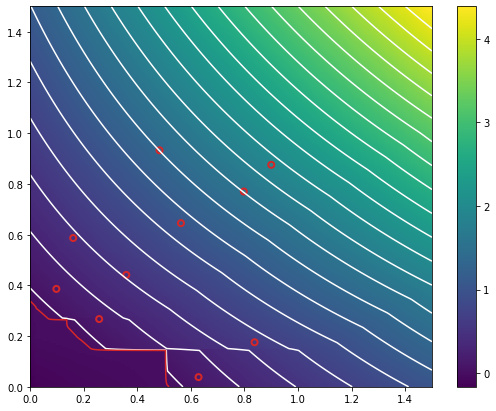

In [19]:
#figure_properties
fig = plt.figure(figsize=[9,7])
ax = fig.gca()
ax.set_xlim([0,1.5])
ax.set_ylim([0,1.5])

# compute infill
M, N = 200, 200
x = np.linspace(0, 1.5, M)
y = np.linspace(0, 1.5, N)
xx, yy = np.meshgrid(x, y)
xy = np.vstack((xx.flat, yy.flat)).T

zz = np.array([sms._scalarise_y(np.array(xy[i:i+1]), np.array([uncertainty,uncertainty]), True) for i in range(len(xy))])
zz = zz.reshape(N,M)

n_contours=20
front_value=0.
#image infill
pcol = ax.pcolor(xx, yy, zz)
levels = np.linspace(zz.min(), zz.max(), n_contours+2)[1:-1]
ax.contour(xx, yy, zz, colors="white", levels=levels)
if front_value is not None:
    ax.contour(xx, yy, zz, colors="C3", levels=[front_value])
    front_legend = plt.Line2D([0], [0], c="C3")

# scatter samples
ax.scatter(sms.Y[:,0], sms.Y[:,1], facecolors='none', edgecolors="C3", linewidth=2., label="dominated samples")
fig.colorbar(pcol)
fig